## Exploratory Data Analysis 

- **Data**: The data used in the EDA was the 2021A subset of the NA62 dataset from CERN'S Super Proton Synchrotron. 
- **Purpose**: The purpose of this notebook is to conduct an exploratory data analysis on the 2021A data.


## Imports 

In [1]:
import h5py 
import numpy as np 
import pandas as pd
import polars as pl
import os
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import glob
import warnings

## 1. EDA on the events data

### 1.1 Read the data

In [2]:
# Read the parquet files for events 
df = pd.read_parquet('../../data/full_events.parquet')

In [3]:
# Check the number of rows from the dataframe
df.shape[0]

2376174

### 1.2 Count the number of pions and muons in the events data

In [4]:
# Count number of pions and muons in the events data
df['class'].value_counts()

class
muon    2160219
pion     215955
Name: count, dtype: int64

### 1.3 Describe the `track_momentum`

In [5]:
# Describe the track_momentum
df['track_momentum'].describe()

count    2.376174e+06
mean     3.708580e+01
std      1.260541e+01
min      4.585458e+00
25%      2.788744e+01
50%      3.605733e+01
75%      4.562446e+01
max      7.555345e+01
Name: track_momentum, dtype: float64

### 1.4 Plot track momentum distributions for each particle

/var/folders/v0/slk4rwcj0cz5hchw7hz83hlw0000gn/T/ipykernel_21683/2459550156.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.figure.axes[1].set_xticklabels(g.figure.axes[1].get_xticklabels(),
/var/folders/v0/slk4rwcj0cz5hchw7hz83hlw0000gn/T/ipykernel_21683/2459550156.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.figure.axes[0].set_yticklabels(g.figure.axes[0].get_yticklabels(),
/var/folders/v0/slk4rwcj0cz5hchw7hz83hlw0000gn/T/ipykernel_21683/2459550156.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.figure.axes[1].set_yticklabels(g.figure.axes[1].get_yticklabels(),


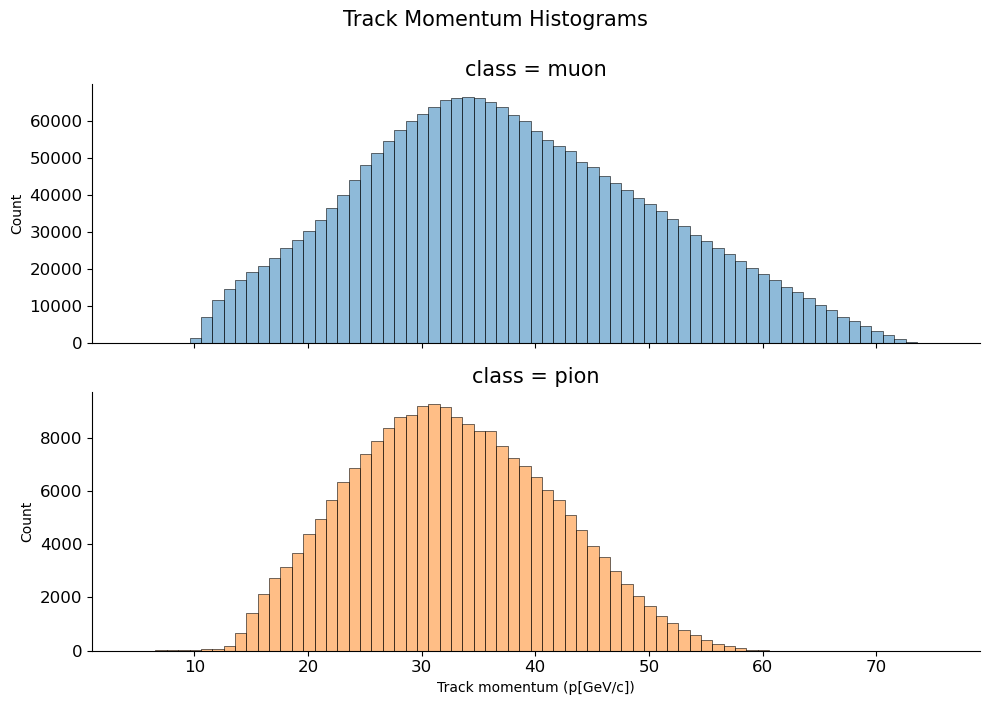

In [6]:
# Colour the distribution by class 
g = sns.displot(
    data=df,
    x="track_momentum",
    col="class",
    hue="class",
    binwidth=1,
    facet_kws=dict(sharey=False),
    col_wrap=1,
    legend=False
)

# Configure the plot
g.fig.suptitle("Track Momentum Histograms", y=1, fontsize=15)
g.set_titles(size=15)
g.set_xlabels("Track momentum (p[GeV/c])")
g.set_ylabels()
g.fig.set_figheight(7)
g.fig.set_figwidth(10)
g.figure.axes[1].set_xticklabels(g.figure.axes[1].get_xticklabels(), 
                                fontdict={'fontsize': 12})
g.figure.axes[0].set_yticklabels(g.figure.axes[0].get_yticklabels(), 
                                fontdict={'fontsize': 12})
g.figure.axes[1].set_yticklabels(g.figure.axes[1].get_yticklabels(), 
                                fontdict={'fontsize': 12})

g.tight_layout()

# Save the plot 
plt.savefig("../../figures/eda_momentum_distribution.png")

### 1.5 Describe the total number of hits per event

In [7]:
# Describe the total_hit column
df['total_hits'].describe()

count    2.376174e+06
mean     4.183072e+01
std      2.304934e+01
min      5.000000e+00
25%      2.400000e+01
50%      3.700000e+01
75%      5.400000e+01
max      3.790000e+02
Name: total_hits, dtype: float64

### 1.6 Plot total number of hits per event for muons and pions

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


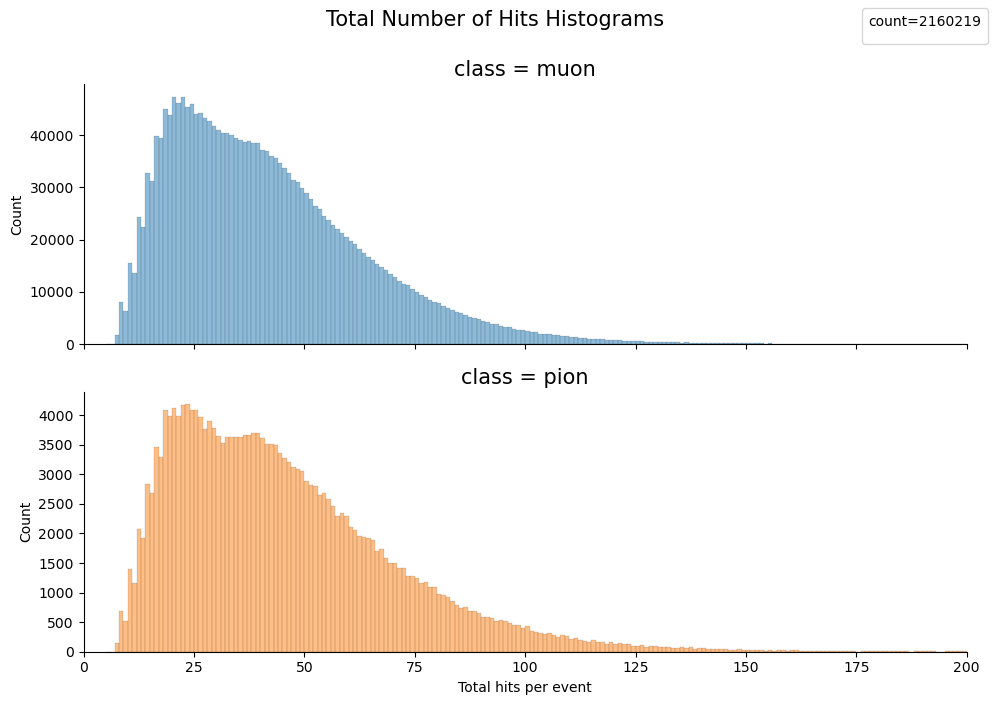

In [8]:
# Colour the distribution by class 
g = sns.displot(
    data=df,
    x="total_hits",
    col="class",
    hue="class",
    binwidth=1,
    facet_kws=dict(sharey=False),
    col_wrap=1,
    legend=False
)

# Configure the plot
g.fig.suptitle("Total Number of Hits Histograms", y=1, fontsize=15)
g.set_titles(size=15)
g.set_xlabels("Total hits per event")
g.set_ylabels()
g.fig.set_figheight(7)
g.fig.set_figwidth(10)
g.fig.legend(title=f"count={df.label.value_counts()[0]}", 
                fontsize=12)

for ax in g.axes:
    ax.set_xlim(0, 200)
    
plt.tight_layout()

# Save the plot
plt.savefig("../../figures/eda_number_hits.png")

### 1.7 2D histograms showing track position distributions for each particle

### 1.7.1 Track position distribution of muon

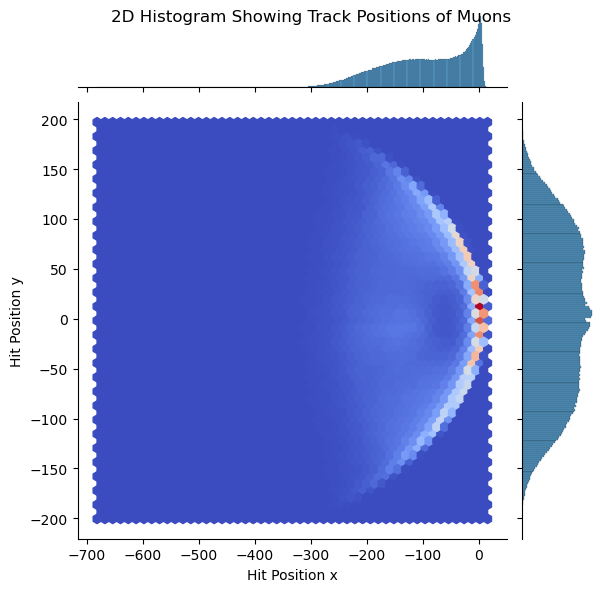

In [9]:
# Filter for muons for plotting purpose 
df_muon = df.query('`class` == "muon"')

# Plot the 2D histogram
g = sns.jointplot(data=df_muon, x='track_pos_x', y='track_pos_y', kind='hex', cmap='coolwarm')

# Configure the plot
g.fig.suptitle("2D Histogram Showing Track Positions of Muons")
g.set_axis_labels("Hit Position x", "Hit Position y")

# Save the plot
plt.savefig("../../figures/eda_muon_track_position.png")

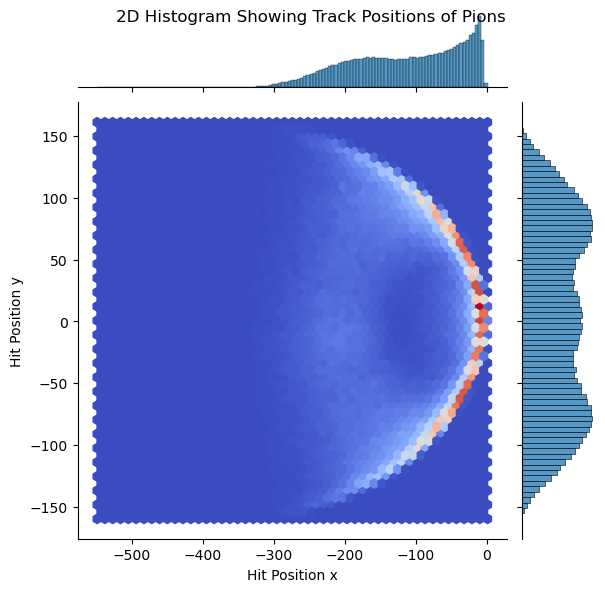

In [10]:
# Filter for pions for plotting purpose
df_muon = df.query('`class` == "pion"')

# Plot the 2D histogram
g = sns.jointplot(data=df_muon, x='track_pos_x', y='track_pos_y', kind='hex', cmap='coolwarm')

# Configure the plot
g.fig.suptitle("2D Histogram Showing Track Positions of Pions")
g.set_axis_labels("Hit Position x", "Hit Position y")

# Save the plot
plt.savefig("../../figures/eda_pion_track_position.png")

### 1.8 Plot ring radius vs. track momentum 

#### 1.8.1 Theoretical ring radius vs. track momentum

/var/folders/v0/slk4rwcj0cz5hchw7hz83hlw0000gn/T/ipykernel_21683/1394526061.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.figure.axes[0].set_xticklabels(g.figure.axes[0].get_xticklabels(),
/var/folders/v0/slk4rwcj0cz5hchw7hz83hlw0000gn/T/ipykernel_21683/1394526061.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.figure.axes[0].set_yticklabels(g.figure.axes[0].get_yticklabels(),


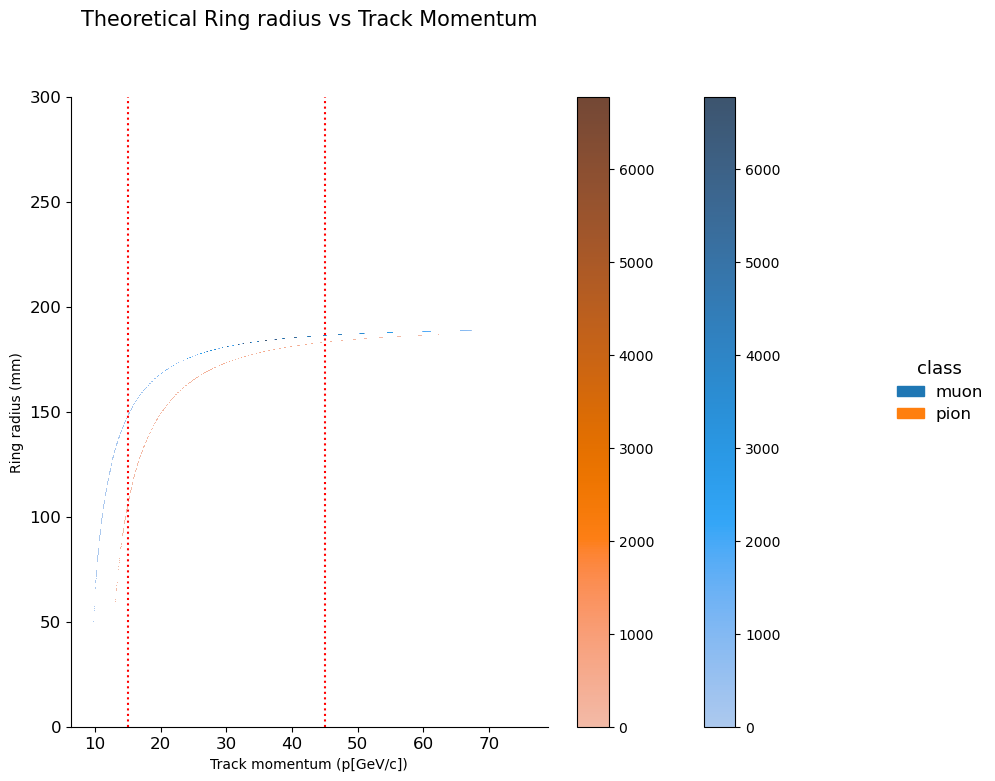

In [11]:
# Filter out the outliers 
df_subset = df.query(("abs(ring_centre_pos_y) < 500 & abs(ring_centre_pos_x) < 500"))

# Plot theoretical ring radius vs. track momentum and colour by class
g = sns.displot(
    x=df_subset["track_momentum"],
    y=df_subset["ring_radius_cal"],
    hue=df_subset["class"],
    cbar=True, 
    binwidth=(0.1, 0.1)
);

# Configure the plot
g.ax.set_title("Theoretical Ring radius vs Track Momentum", y=1.1, fontsize=15)
g.set_axis_labels("Track momentum (p[GeV/c])", "Ring radius (mm)")
g.set_titles("Ring Centres for Label: {col_name}")
g.ax.tick_params(axis='x', labelsize= 13)
g.ax.tick_params(axis='y', labelsize= 13)
g.ax.set_ylim([0, 300])   
g.fig.set_figheight(8)
g.fig.set_figwidth(10)
g.tight_layout()

g.figure.axes[0].set_xticklabels(g.figure.axes[0].get_xticklabels(), 
                                fontdict={'fontsize': 12})
g.figure.axes[0].set_yticklabels(g.figure.axes[0].get_yticklabels(), 
                                fontdict={'fontsize': 12})
g.legend.get_title().set_fontsize(13)

for text in g.legend.texts:
    text.set_fontsize(12)
    
g.figure.axes[0].set_rasterized(rasterized=True)

plt.axvline(15, color="red", linestyle="dotted")
plt.axvline(45, color="red", linestyle="dotted")

# Save the plot
plt.savefig("../../figures/eda_radius_vs_momentum_theoretical.png")

#### 1.8.2 SOTA ring radius vs. track momentum 

/var/folders/v0/slk4rwcj0cz5hchw7hz83hlw0000gn/T/ipykernel_21683/278750171.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.figure.axes[0].set_xticklabels(g.figure.axes[0].get_xticklabels(),
/var/folders/v0/slk4rwcj0cz5hchw7hz83hlw0000gn/T/ipykernel_21683/278750171.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.figure.axes[0].set_yticklabels(g.figure.axes[0].get_yticklabels(),


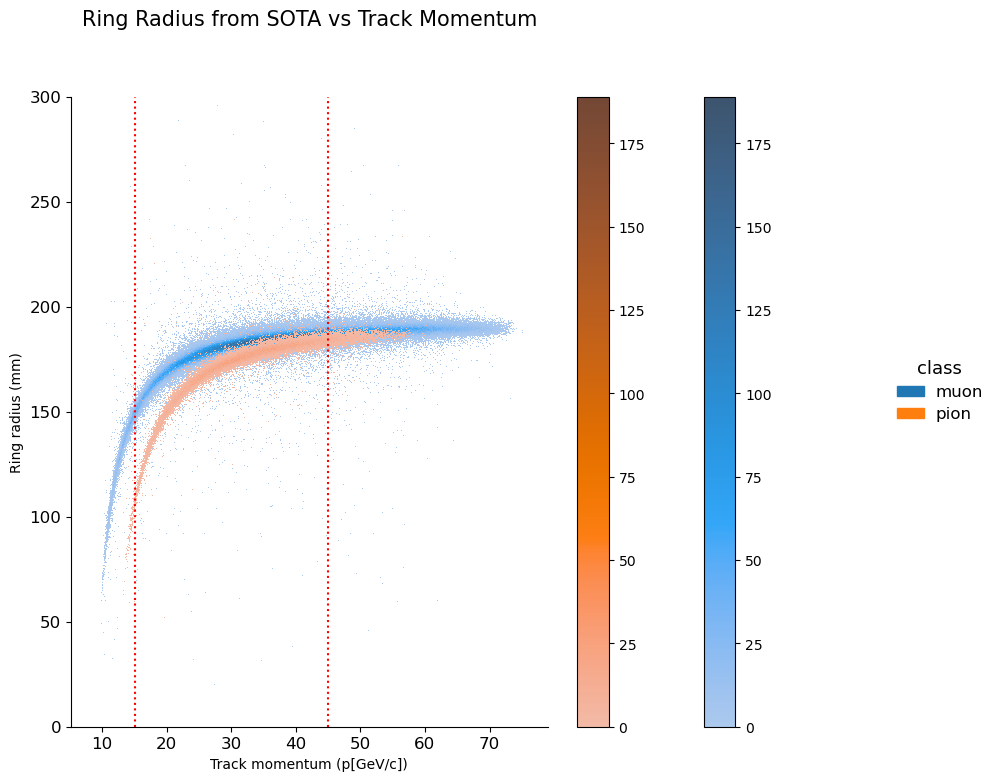

In [12]:
# Filter out the outliers 
df_subset = df.query(("abs(ring_centre_pos_y) < 500 & abs(ring_centre_pos_x) < 500"))

# Plot sota ring radius vs. track momentum and colour by class
g = sns.displot(
    x=df_subset["track_momentum"],
    y=df_subset["ring_radius"],
    hue=df_subset["class"],
    cbar=True, 
    binwidth=(0.1, 0.1)
);

# Configure the plot
g.ax.set_title("Ring Radius from SOTA vs Track Momentum", y=1.1, fontsize=15)
g.set_axis_labels("Track momentum (p[GeV/c])", "Ring radius (mm)")
g.set_titles("Ring Centres for Label: {col_name}")
g.ax.tick_params(axis='x', labelsize= 13)
g.ax.tick_params(axis='y', labelsize= 13)
g.ax.set_ylim([0, 300])   
g.fig.set_figheight(8)
g.fig.set_figwidth(10)
g.tight_layout()

g.figure.axes[0].set_xticklabels(g.figure.axes[0].get_xticklabels(), 
                                fontdict={'fontsize': 12})
g.figure.axes[0].set_yticklabels(g.figure.axes[0].get_yticklabels(), 
                                fontdict={'fontsize': 12})
g.legend.get_title().set_fontsize(13)

for text in g.legend.texts:
    text.set_fontsize(12)
    
g.figure.axes[0].set_rasterized(rasterized=True)

plt.axvline(15, color="red", linestyle="dotted")
plt.axvline(45, color="red", linestyle="dotted")

# Save the plot
plt.savefig("../../figures/eda_radius_vs_momentum_sota.png")

### 1.9 Distribution of number of hits binned by calculated radius 

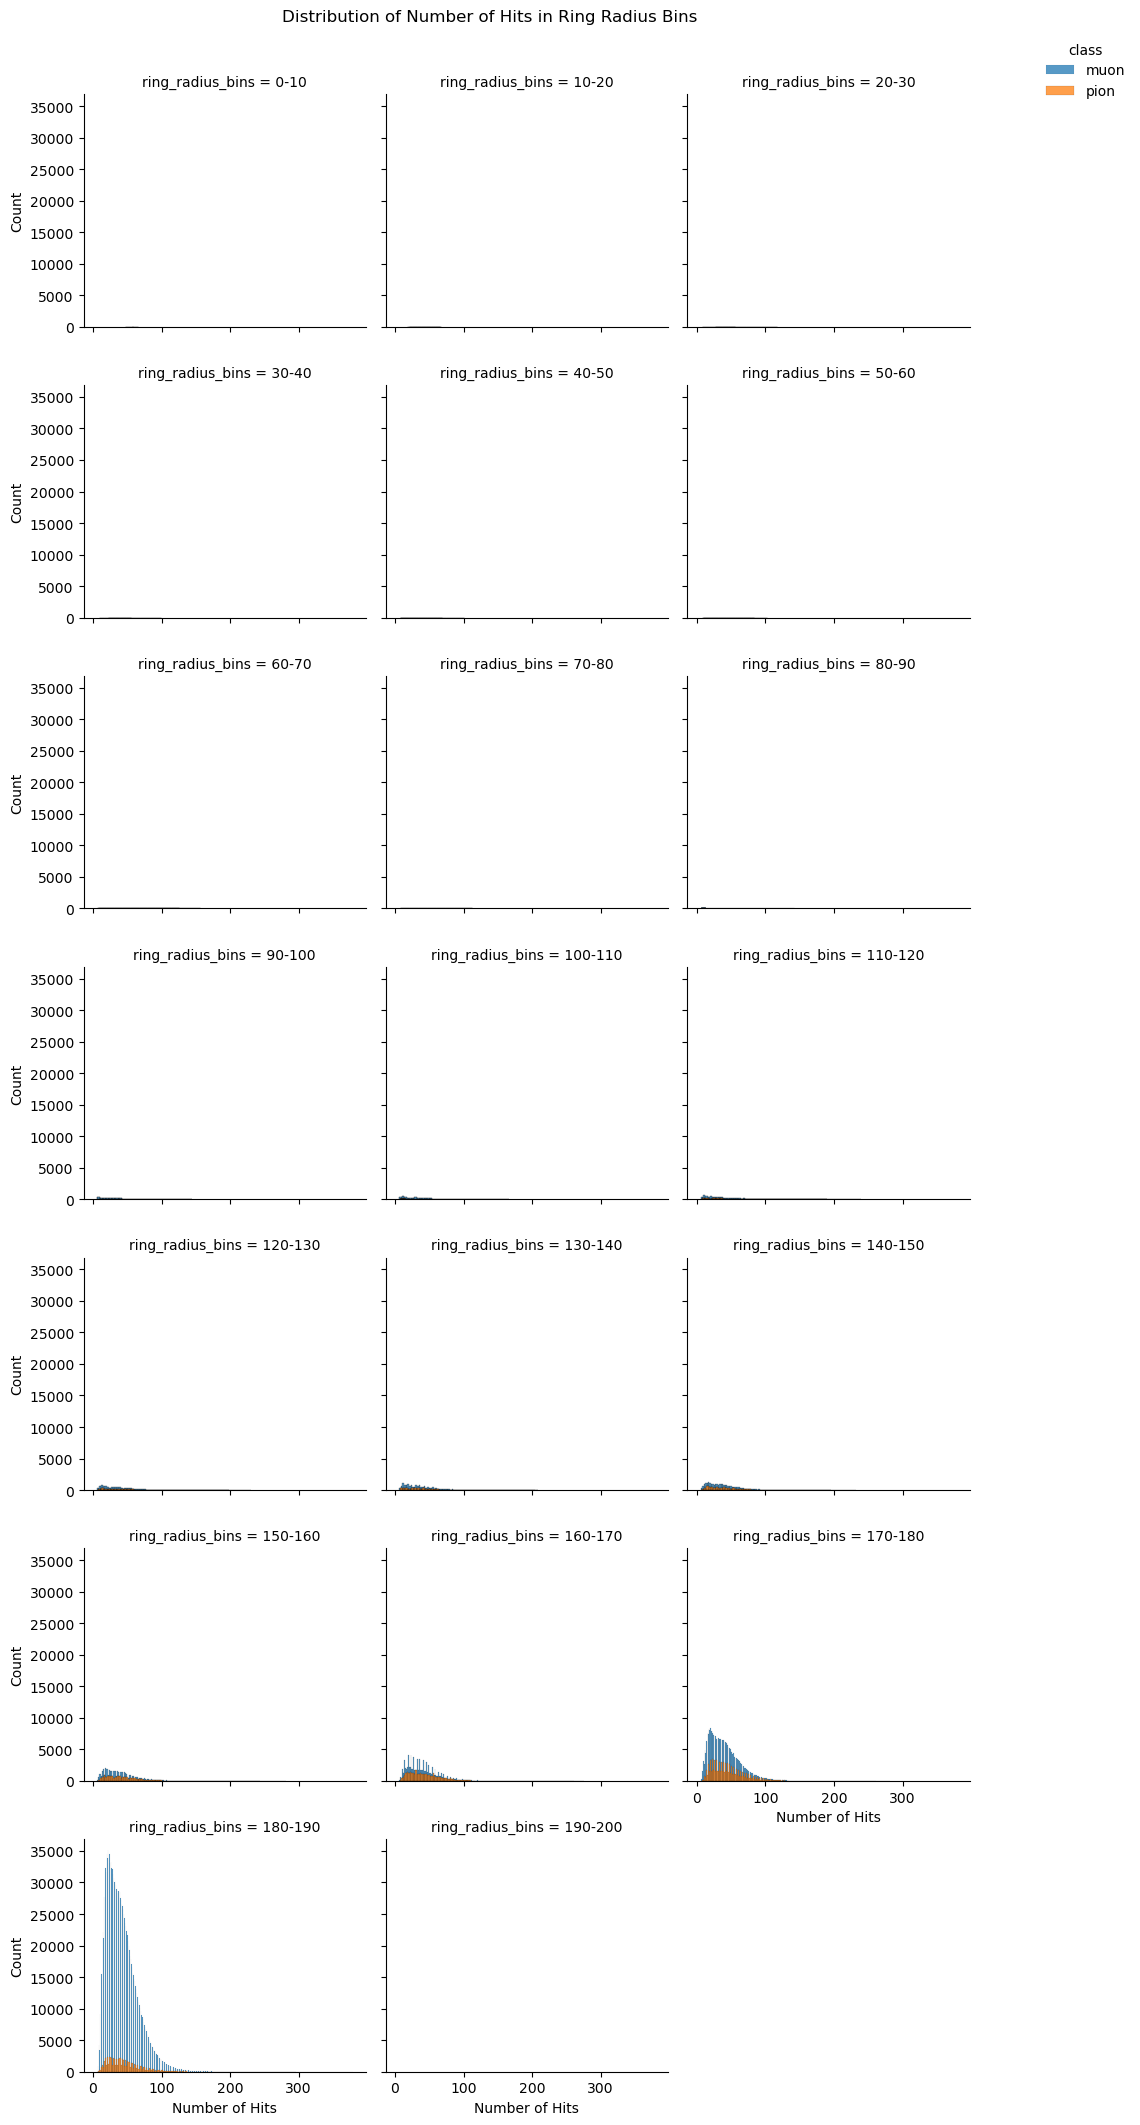

In [13]:
# Cut the theoretical ring radius to 20 bins 
bins = range(0, 201, 10)
labels = [f'{i}-{i+10}' for i in range(0, 191, 10)]
df['ring_radius_bins'] = pd.cut(df['ring_radius_cal'], bins=bins, labels=labels)

# Plot the histogram and facet by momentum bin
g = sns.FacetGrid(df, col='ring_radius_bins', hue='class', col_wrap=3)
g.map(sns.histplot, 'total_hits')

# Configure the plot
g.set_axis_labels('Number of Hits', 'Count')
g.fig.suptitle('Distribution of Number of Hits in Ring Radius Bins', y=1.01)
g.add_legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()



## 2. EDA on the events data

### Read the hits data

In [14]:
# Read the full hits parquet file as lazyframe
df_hits = pl.scan_parquet('../../data/hits.parquet')

In [15]:
# Check the number of rows in the dataframe
df_hits.collect().shape[0]

99397075

### Filter for in-time hits only (chod_delta < 0.5)

In [16]:
# Filter for in-time hits with abs(chod_delta) < 0.5
df_hits_intime = df_hits.filter(pl.col("chod_delta").abs() < 0.5)

In [17]:
# Check the number of rows for in-time hits
df_hits_intime.collect().shape[0]

41003172

### 2.1 2D Histogram showing distribution of hit positions for both particles 

In [18]:
# Subset for muon and pion in-time hits 
df_intime_muon = df_hits_intime.filter(pl.col("class") == "muon")
df_intime_pion = df_hits_intime.filter(pl.col("class") == "pion")

### 2.1.1 Distribution of hit positions for muons 

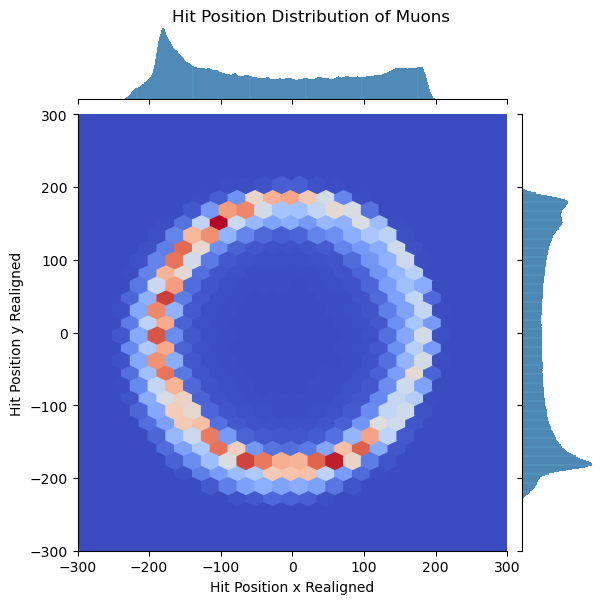

In [25]:
# Plot the distribution of hit positions for muons
g = sns.jointplot(data=df_intime_muon.collect(), x='x_aligned', y='y_aligned', kind='hex', cmap='coolwarm')

# Configure the plot
g.fig.suptitle("Hit Position Distribution of Muons", y=1)
g.set_axis_labels('Hit Position x Realigned', 'Hit Position y Realigned')

g.ax_joint.set_xlim(-300, 300)
g.ax_joint.set_ylim(-300, 300)

# Save the plot
plt.savefig("../../figures/eda_hit_position_muon_all.png")

### 2.1.2 Distribution of hit positions for pions

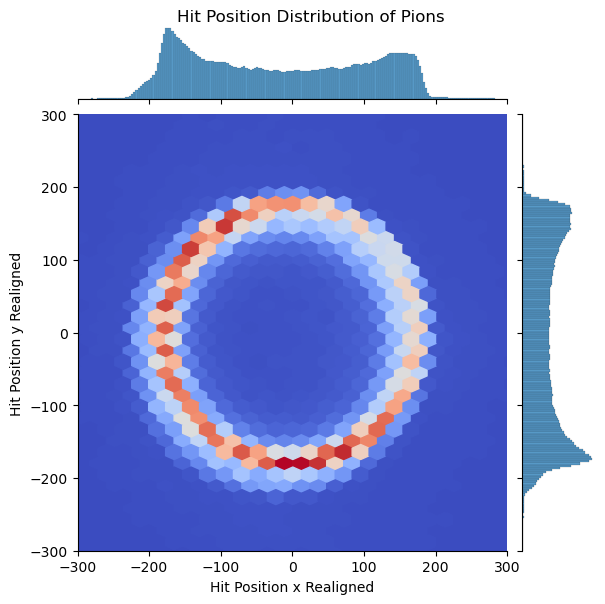

In [26]:
# Plot the distribution of hit positions for pions
g = sns.jointplot(data=df_intime_pion.collect(), x='x_aligned', y='y_aligned', kind='hex', cmap='coolwarm')

# Configure the plot
g.fig.suptitle("Hit Position Distribution of Pions", y=1)
g.set_axis_labels('Hit Position x Realigned', 'Hit Position y Realigned')

g.ax_joint.set_xlim(-300, 300)
g.ax_joint.set_ylim(-300, 300)

# Save the plot
plt.savefig("../../figures/eda_hit_position_pion_all.png")

### 2.2 2D Histogram showing distribution of hit positions for both particles between 20 and 25 GeV/c 

In [21]:
# Filter for track momentum between 20 and 25 GeV/c
df_subset = df_hits_intime.filter((pl.col('track_momentum') >= 20) & (pl.col('track_momentum') <= 25))

In [22]:
# Subset muons and pions
df_subset_muon = df_subset.filter(pl.col("class") == "muon")
df_subset_pion = df_subset.filter(pl.col("class") == "pion")

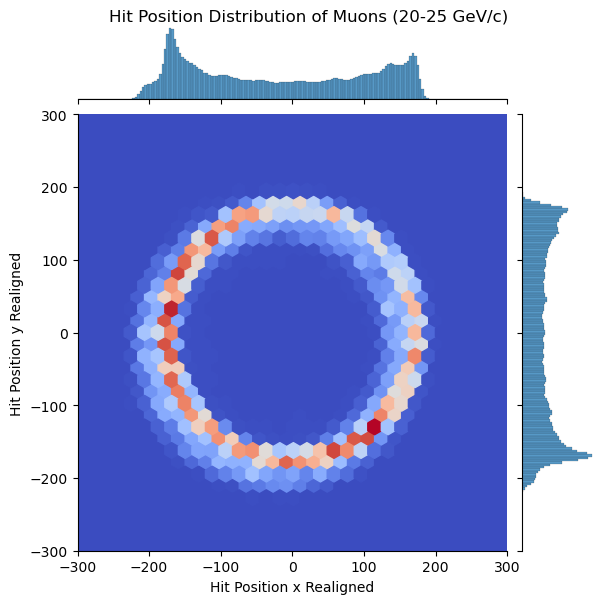

In [29]:
# Plot the distribution of hit positions for pions
g = sns.jointplot(data=df_subset_muon.collect(), x='x_aligned', y='y_aligned', kind='hex', cmap='coolwarm')

# Configure the plot
g.fig.suptitle("Hit Position Distribution of Muons (20-25 GeV/c) ", y=1)
g.set_axis_labels('Hit Position x Realigned', 'Hit Position y Realigned')

g.ax_joint.set_xlim(-300, 300)
g.ax_joint.set_ylim(-300, 300)

# Save the plot
plt.savefig("../../figures/eda_hit_position_muon_subset.png")

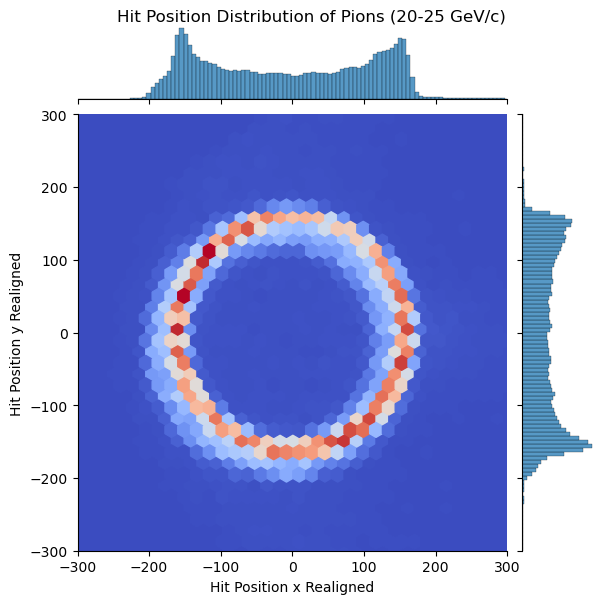

In [30]:
# Plot the distribution for pions
g = sns.jointplot(data=df_subset_pion.collect(), x='x_aligned', y='y_aligned', kind='hex', cmap='coolwarm')

# Configure the plot
g.fig.suptitle("Hit Position Distribution of Pions (20-25 GeV/c)", y=1)
g.set_axis_labels('Hit Position x Realigned', 'Hit Position y Realigned')

g.ax_joint.set_xlim(-300, 300)
g.ax_joint.set_ylim(-300, 300)

# Save the plot
plt.savefig("../../figures/eda_hit_position_pion_subset.png")